# Clustering (Unsupervised learning)

Los métodos no-supervisados son técnicas de *machine learning* que nos sirven para descubrir patrones en los datos.

Los métodos no-supervisados (unsupervised) se clasifican en:

* Clustering
* Dimension reduction

Los métodos de clustering se pueden clasificar a su vez en dos técnicas:

* Aglomerativos: tenemos tantos clusters como puntos. Unimos clusters hasta que todos los puntos quedan englobados en un único cluster
* Disociativos: proceso inverso, comenzamos con un único cluster y realizamos divisiones.

## Método aglomerativo

Iremos aglutinando puntos en base a una cierta distancia.

## Métodos de enlace
### Enlace simple

La distancia entre dos clusters es el mínimo de las distancias entre cualquiera dos puntos del cluster I y el cluster II.

Dos cluster con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = min(d(x_i, y_j)) \ \forall x_i \in C_m, y_j \in C_n
$$

### Enlace completo

La distancia entre dos clusters es el **máximo** de las distancias entre cualquiera dos puntos del cluster I y del cluster II.

Dos clusters con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = max(d(x_i, y_j)) \ \forall x_i \in C_m, y_j \in C_n
$$

### Enlace promedio

La distancia entre dos clusters es el **promedio** de las distancias entre cualquiera dos puntos del cluster I y del cluster II.

Dos clusters con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = \sum \frac{d(x_i, y_j)}{n} \ \forall x_i \in C_m, y_j \in C_n
$$

### Enlace completo

La distancia entre dos clusters es el **máximo** de las distancias entre cualquiera dos puntos del cluster I y del cluster II.

Dos clusters con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = max(d(x_i, y_j)) \ \forall x_i \in C_m, y_j \in C_n
$$

### Enlace del centroide

La distancia entre dos clusters es el **centroide** ( punto medio) de las distancias entre cualquiera dos puntos del cluster I y del cluster II.

Dos clusters con la distancia mínima entre ellos se combinan del siguiente modo:

$$
d(C_m, C_n) = d(\widehat{C_m}, \widehat{C_n})
$$

### Enlace de Ward

Un cluster que minimiza el incremento del error combinado en la suma de los cuadradosde las varianzas se une a un cluster ya existente para formar uno nuevo.

Los clusters minimizan la varianza dentro de los puntos del mismo y en el dataset global

$$
min \sum_{i=1}^{k}\sum_{x_i \in C_i}(x_i - c_j)^2
$$

El incremento más pequeño del término de error de la varianza prueba que los nuevos elementos unidos a los clúster son más similares a dicho clúster que a otros ya existentes en otros clusters.

## Clustering jerárquico

Método aglomerativo donde cada punto empieza siendo un único cluster y en cada paso los vamos juntando hasta tener un único cluster basado en las similitudes entre observaciones.

* Empezamos con cada observación en un cluster
* Encontramos la menor distancia en la matriz de distancias y unimos las dos observaciones en un nuevo cluster
* Recalculamos las distancias entre los clusters antiguos y el nuevo reción creado con alguno de los métodos de enlace vistos.
* Repetimos los pasos hasta que solo quede un cluster con las N observaciones.

In [1]:
# bibliotecas standars
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# bibliotecas específicas
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance_matrix

# seaborn style
sns.set()

In [2]:
# datos
iris = datasets.load_iris()

In [3]:
# Valores del target
target = np.where(iris.target == 0, iris.target_names[0], iris.target)
target = np.where(iris.target == 1, iris.target_names[1], target)
target = np.where(iris.target == 2, iris.target_names[2], target)
np.unique(target)

array(['setosa', 'versicolor', 'virginica'], dtype='<U21')

In [4]:
# Dataframe
df = pd.DataFrame(data=np.c_[iris.data, target],
                  columns=iris.feature_names + ['species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null object
sepal width (cm)     150 non-null object
petal length (cm)    150 non-null object
petal width (cm)     150 non-null object
species              150 non-null object
dtypes: object(5)
memory usage: 5.9+ KB


In [6]:
df1 = df.drop('species', axis= 1).apply(pd.to_numeric)
df1['species'] = df['species']
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


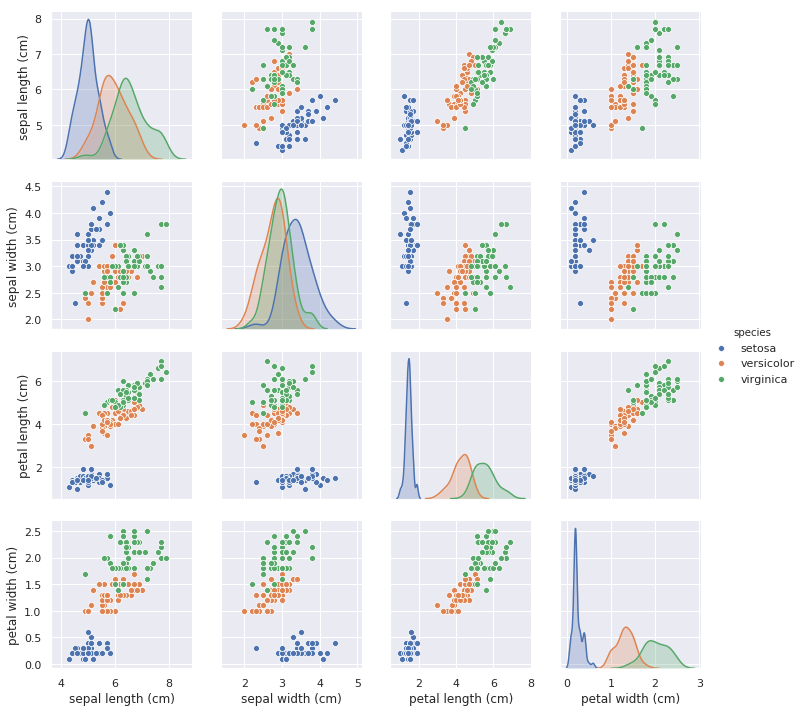

In [7]:
# scatter matrix
sns.pairplot(data=df1, hue='species')
plt.show()

### Representación gráfica del dendograma

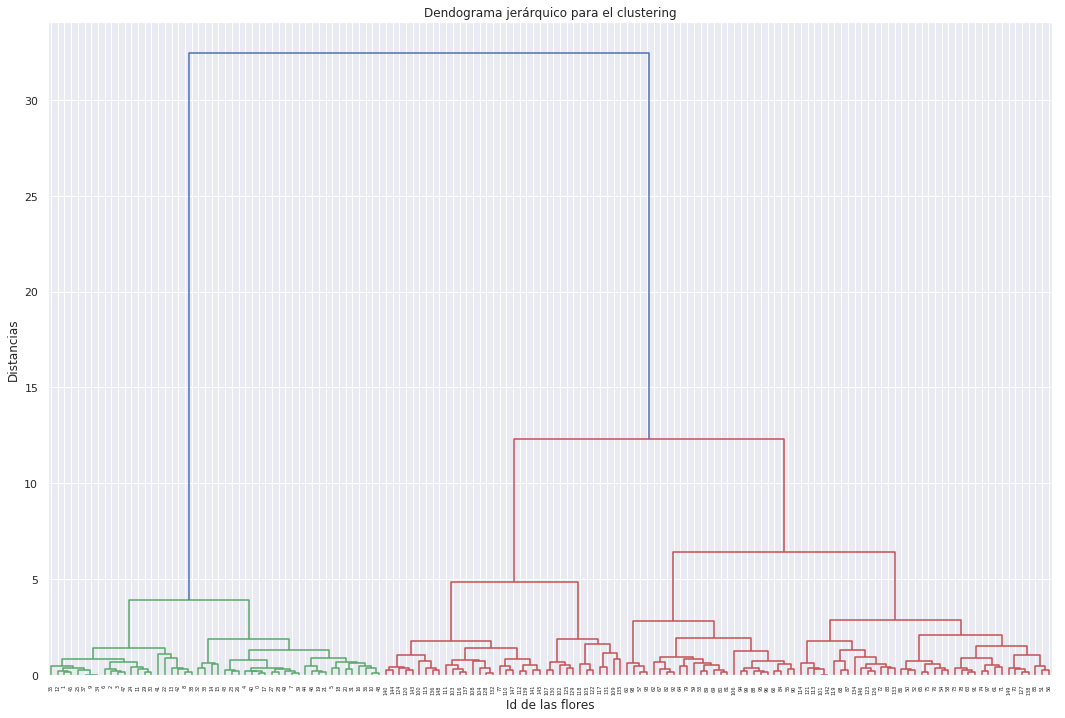

In [8]:
Z = sch.linkage(df.drop(['species'], axis=1), "ward")
plt.figure(figsize=(18, 12))
plt.title("Dendograma jerárquico para el clustering")
plt.xlabel("Id de las flores")
plt.ylabel("Distancias")
sch.dendrogram(Z, leaf_rotation=90.)
plt.show()

## Clusters

* X: dataset (array de $n \cdot m$ de puntos a clusterizar
* n: número de datos
* m: número de rasgos
* Z: array de enlace del clúster con la información de las uniones.
* k: número de clusters

Para comparar, vamos a generar una serie de datos artificiale o sintéticos, que nos ayudará a comprender mejor el proceso de clustering.

In [9]:
# Semilla
np.random.seed(4711)

# primer cluster
a = np.random.multivariate_normal([10, 0],
                                  [[3, 1], [1,4]],
                                  size = [100,])
b = np.random.multivariate_normal([0, 20],
                                  [[3, 1], [1,4]],
                                  size = [50,])

X = np.concatenate((a,b))
print("Shape: ", X.shape)

Shape:  (150, 2)


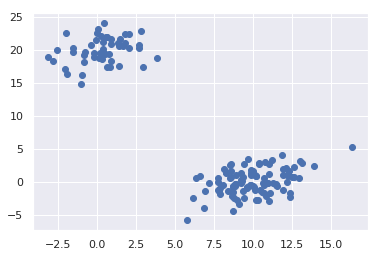

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [11]:
Z = sch.linkage(X, "ward")
Z.shape

(149, 4)

### Comprobación de la precisión

Hay diversos métodos en la literatura para validar un clúster. Cuando trabajamos con métodos jerárquicos nos podemos plantear   dos problemas:

* En que medida representan la estructura  final obtenida las similitudes o diferencias entre los objetos de estudio.
* El número idóneo de agrupaciones o clusters que mejor representen la estructura natural de los datos. 

Para el primer problema calculamos el **coeficiente cofenético**.

Este coeficiente mide la correlación entre las distancias iniciales, tomadas a partir de los datos originales, y las distancias finales con las cuales los individuos se han unido durante el desarrollo del método.
Valores altos del coeficiente cofenético indica que durante el proceso no ha ocurrido una gran perturbación en lo que se refiere a la estructura original de los datos.

El coeficiente cofenético interesa que sea lo mas elevado posible, siendo siempre menor o igual que 1.

In [12]:
# Biblioteca para clustering
from scipy.spatial.distance import pdist

In [13]:
c, coph_dist = sch.cophenet(Z, pdist(X))
print("La conservación distanicas originales: ", c)

La conservación distanicas originales:  0.9800148387574268


In [14]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

Los puntos situados en la posición (52, 53), cuya distancia y números de elementos en el clúster quedan especificados en los dos últimos valores.

### Representación gráfica del dendograma

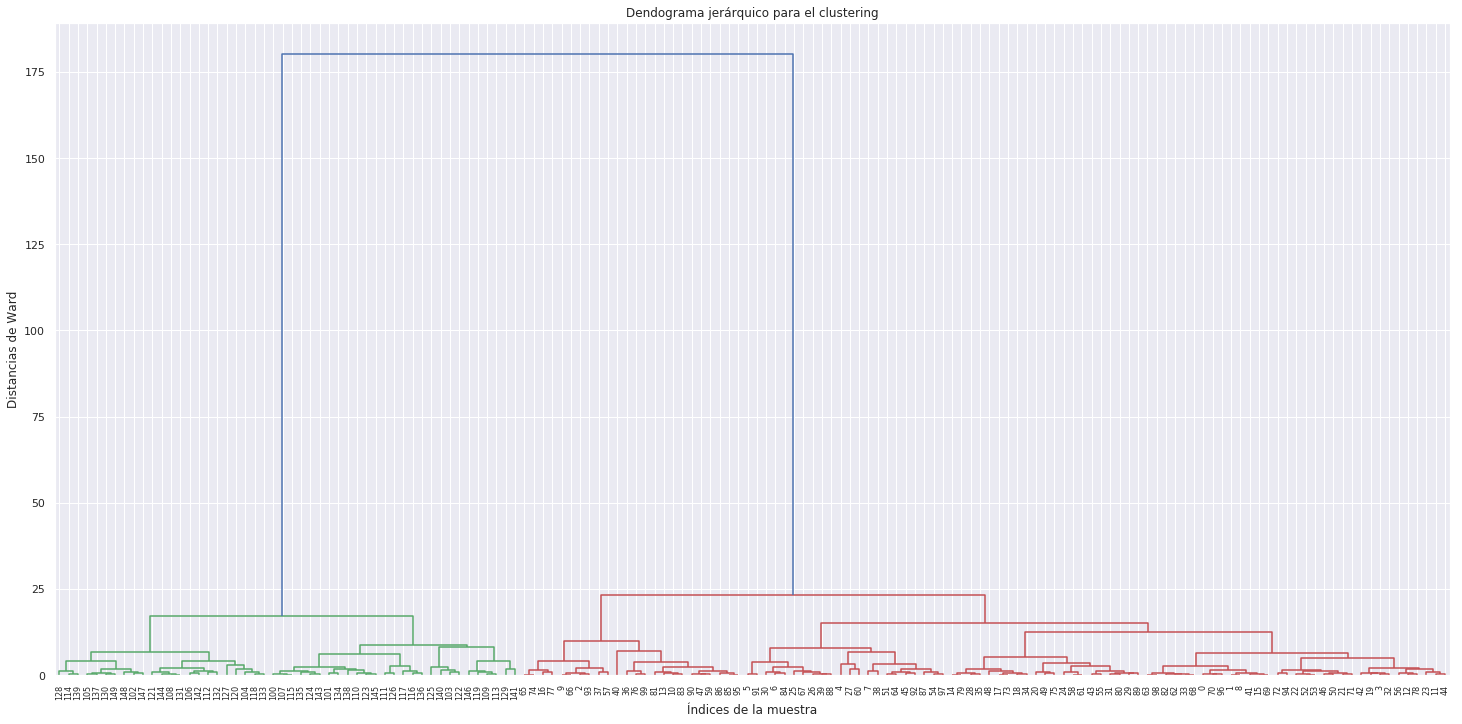

In [15]:
plt.figure(figsize=(25, 12))
plt.title("Dendograma jerárquico para el clustering")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias de Ward")
sch.dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0)
plt.show()

In [18]:
Z[-4:,]

array([[287.        , 288.        ,   4.84770851,  36.        ],
       [292.        , 293.        ,   6.39940682,  64.        ],
       [295.        , 296.        ,  12.30039605, 100.        ],
       [294.        , 297.        ,  32.42801258, 150.        ]])

El parámetro `color_threshold` nos permite modificar el parámetro de segmentación

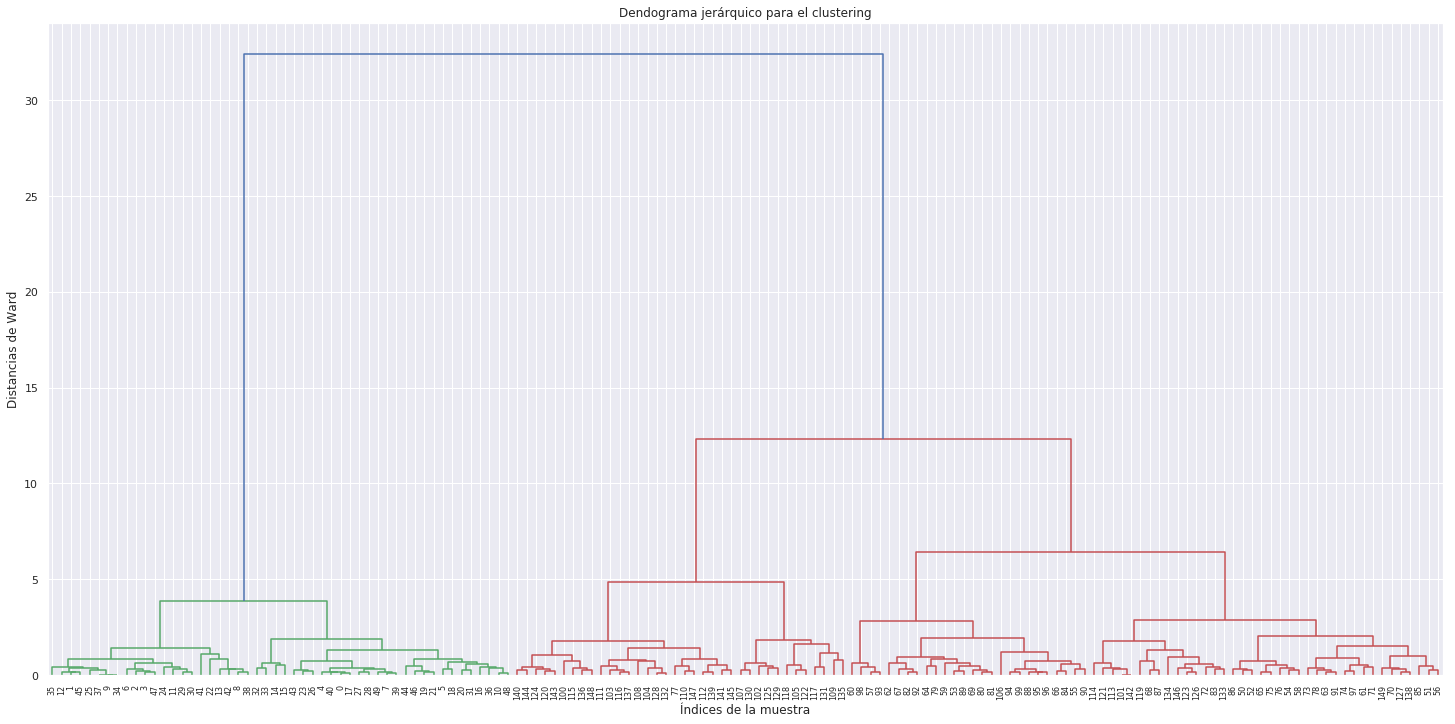

In [19]:
plt.figure(figsize=(25, 12))
plt.title("Dendograma jerárquico para el clustering")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias de Ward")
sch.dendrogram(Z, leaf_rotation=90.,leaf_font_size=8.0,
               color_threshold=0.7 * 32)
plt.show()

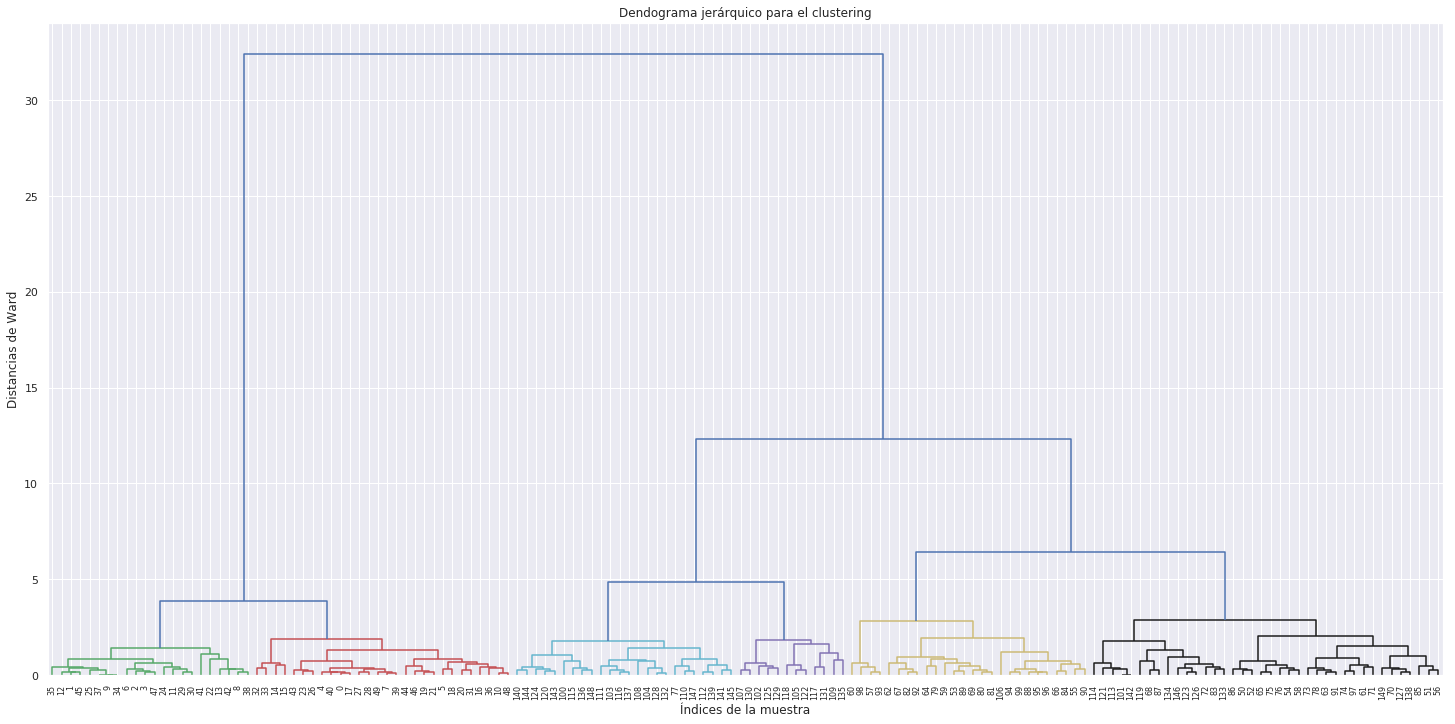

In [20]:
plt.figure(figsize=(25, 12))
plt.title("Dendograma jerárquico para el clustering")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias de Ward")
sch.dendrogram(Z, leaf_rotation=90.,leaf_font_size=8.0,
               color_threshold=0.1 * 32)
plt.show()

### Truncar el dendrograma

Vamos a realizar una versión reducida del mismo.

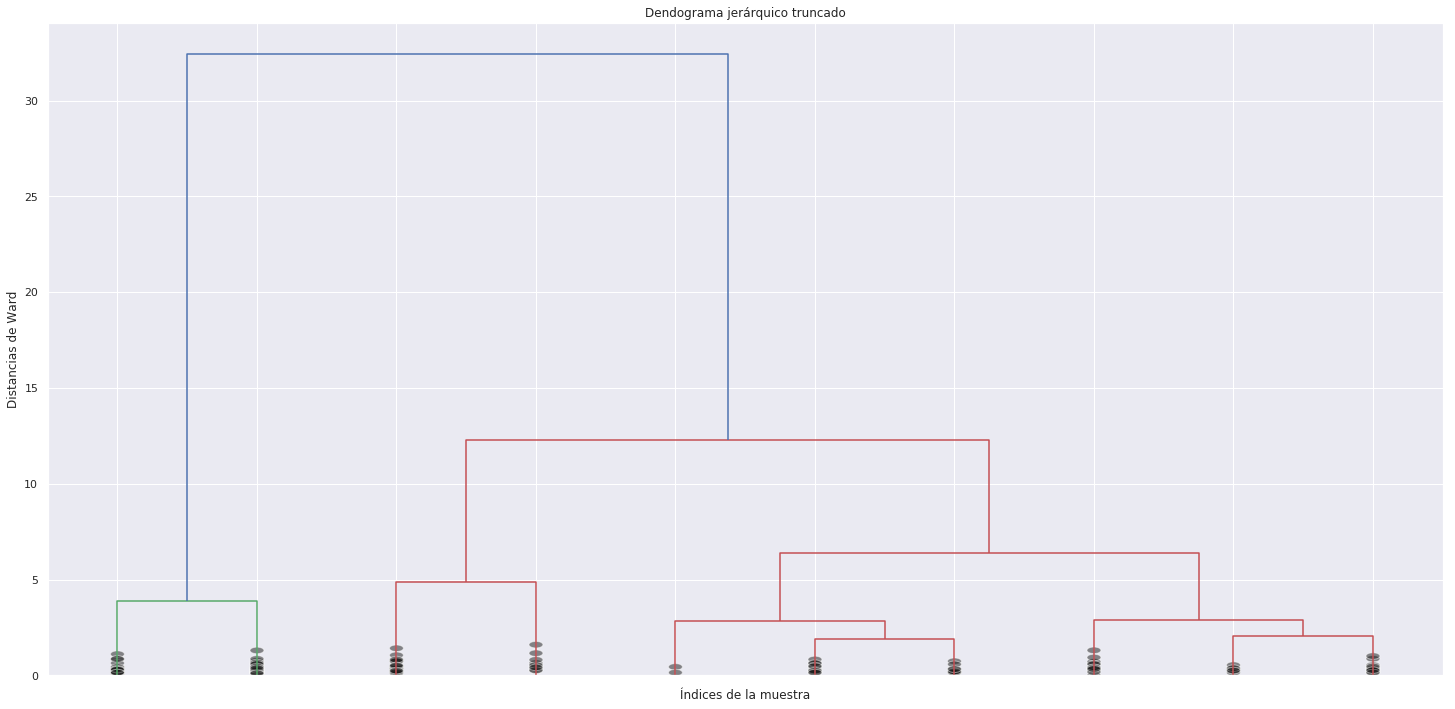

In [26]:
plt.figure(figsize=(25, 12))
plt.title("Dendograma jerárquico truncado")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias de Ward")
sch.dendrogram(Z, leaf_rotation=90., 
               color_threshold=0.7 * 32,
              truncate_mode='lastp', p = 10, show_leaf_counts=False,
              show_contracted=True)
plt.show()

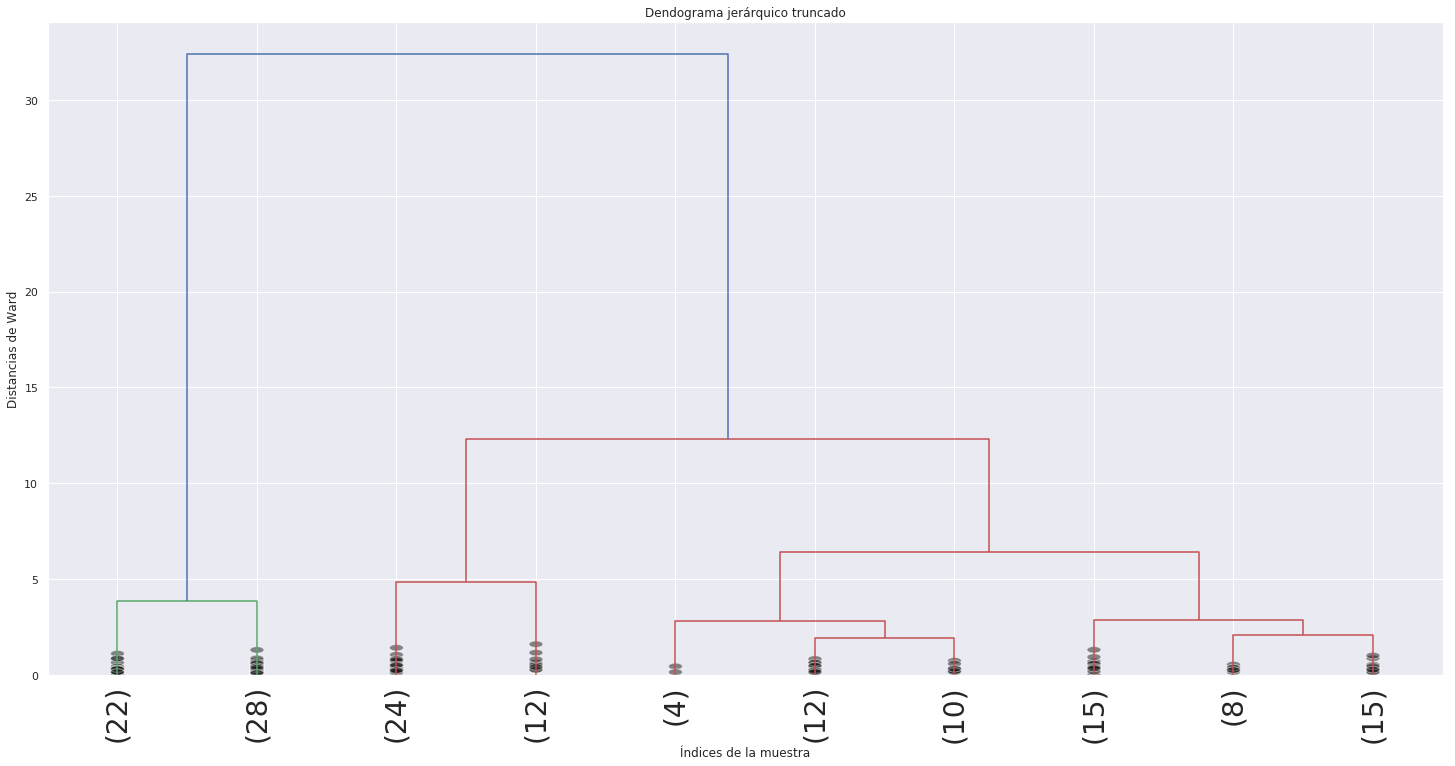

In [27]:
plt.figure(figsize=(25, 12))
plt.title("Dendograma jerárquico truncado")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias de Ward")
sch.dendrogram(Z, leaf_rotation=90.,leaf_font_size=28.0,
               color_threshold=0.7 * 32,
              truncate_mode='lastp', p = 10, show_leaf_counts=True,
              show_contracted=True)
plt.show()